In [31]:
import pandas as pd
import os

input_path = '../data/youtube_spam/'
files = [f for f in os.listdir(input_path) if '.csv' in f]
print(files)

['Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv', 'Youtube02-KatyPerry.csv', 'Youtube01-Psy.csv']


In [2]:
dfs = [pd.read_csv(os.path.join(input_path, f), engine='python') for f in files]
df = pd.concat(dfs).reset_index(drop=True)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
COMMENT_ID    1956 non-null object
AUTHOR        1956 non-null object
DATE          1711 non-null object
CONTENT       1956 non-null object
CLASS         1956 non-null int64
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


In [4]:
df.columns = [c.lower() for c in df.columns]
df.head()

,comment_id,author,date,content,class
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


Text(0.5, 1.0, 'Non-Spam Contents')

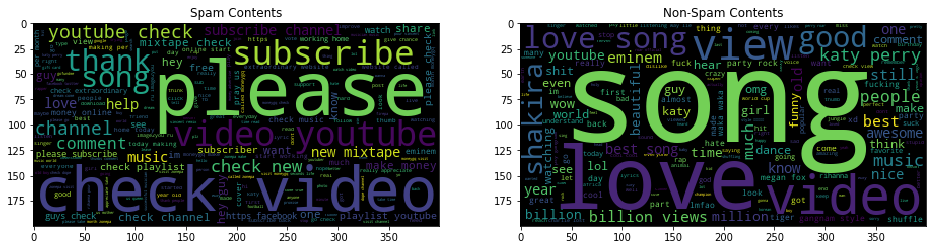

In [32]:
# data exploration
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wc(text):
    wc = WordCloud().generate(' '.join(text))
    return wc

content_spam = df[df['class'] == 1]['content']
content_nonspam = df[df['class'] == 0]['content']

wc_spam = create_wc(content_spam)
wc_nonspam = create_wc(content_nonspam)
ax = plt.subplots(1, 2, figsize=(16, 8))
ax1 = ax[0].get_axes()[0]
ax2 = ax[0].get_axes()[1]

ax1.imshow(wc_spam)
ax2.imshow(wc_nonspam)

ax1.set_title('Spam Contents')
ax2.set_title('Non-Spam Contents')

In [35]:
import re
from bs4 import BeautifulSoup
import nltk

def print_sample(df, message, n=10, col='content'):
    print(message)
    print(df[col].iloc[:n])
    print()

# clean html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df.content = df.content.apply(strip_html)
print_sample(df, 'after html cleaning')

# case folding
df.content = df.content.apply(lambda x: x.lower())
print_sample(df, 'after case folding')

# clean special character
def remove_special_characters(text):
    pattern = r'[^\w]'
    text = re.sub(pattern, ' ',text)
    return text

def preprocessing_pipeline(text):
    text = strip_html(text)
    text = remove_special_characters(text)
    return text

df.content = df.content.apply(remove_special_characters)
print_sample(df, 'after special character cleaning')

# stemming
# remove the stem of original word, useful to reduce the number of feature and prevent overfitting
# you may skip it if you have enough dataset

ps = nltk.porter.PorterStemmer()
def simple_stemmer(text):
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df.content = df.content.apply(simple_stemmer)
print_sample(df, 'after stemming')

# removing the stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=True):
    tokens = text.split()
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df.content = df.content.apply(remove_stopwords)
print_sample(df, 'after stopword removal')

after html cleaning
0                                       2 19 best part
1                                          wierd funny
2    hey guys human want human want sexy fucking gi...
3                         party rock lol wants shuffle
4                                           party rock
5                                              shuffle
6                                                  omg
7                                      song really fun
8                                               awsome
9                                   wow increible song
Name: content, dtype: object

after case folding
0                                       2 19 best part
1                                          wierd funny
2    hey guys human want human want sexy fucking gi...
3                         party rock lol wants shuffle
4                                           party rock
5                                              shuffle
6                                                  

[nltk_data] Downloading package stopwords to /Users/bytedance-
[nltk_data]     it105533/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<strong>Feature Extraction</strong>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')
# vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2)) # word 2-gram 
# vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
bow = vectorizer.fit_transform(df.content)
bow

<1956x4314 sparse matrix of type '<class 'numpy.int64'>'
	with 16288 stored elements in Compressed Sparse Row format>

<strong>Modelling</strong>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import eli5

X_train, X_test, y_train, y_test = train_test_split(bow, df['class'], test_size=0.3)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# bow_sample = vectorizer.fit_transform(sample_texts)
feat_imp_df = pd.DataFrame({'feature': vectorizer.get_feature_names(), 'coefficient': clf.coef_[0]})
feat_imp_df.sort_values('coefficient', ascending=False)

/Users/bytedance-it105533/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,feature,coefficient
3664,subscribe,4.072399
928,check,4.009102
1004,com,2.874505
911,channel,2.483475
1015,comment,1.957549
...,...,...
4260,years,-0.674463
2429,love,-0.682677
2172,jello,-0.733672
3632,still,-0.877916


<strong>Evaluation</strong>

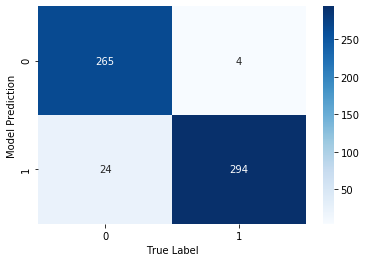

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.color_palette('viridis')
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('True Label')
ax.set_ylabel('Model Prediction')
plt.show()

In [28]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('Accuracy: %.2f' % acc)
print('Precision: %.2f' % pre)
print('Recall: %.2f' % rec)

Accuracy: 0.95
Precision: 0.99
Recall: 0.92


Save model

In [42]:
from sklearn.externals import joblib

output_dir = '../output'
clf_out_name = 'clf.joblib'
vec_out_name = 'vec.joblib'

clf_out_path = os.path.join(output_dir, clf_out_name)
vec_out_path = os.path.join(output_dir, vec_out_name)

joblib.dump(clf, clf_out_path)
joblib.dump(vectorizer, vec_out_path)

['../output/vec.joblib']